# Flo E-commerce Data Analysis Project

Veri Seti Hikayesi

Veri seti son alışverişlerini 2020 - 2021 yıllarında OmniChannel(hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

master_id: Eşsiz müşteri numarası

order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)

last_order_channel : En son alışverişin yapıldığı kanal

first_order_date : Müşterinin yaptığı ilk alışveriş tarihi

last_order_date : Müşterinin yaptığı son alışveriş tarihi

last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi

last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi

order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı

order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı

customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret

customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret

interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

## Veri setinin yüklenmesi ve ilk incelemeler

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

# Veri setinin yüklenmesi
flo_data = pd.read_excel('eCommerce_data_20k.xlsx')

flo_data_copy = flo_data.copy()

# İlk beş satır
flo_data_copy.head()


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


## Veri setine index eklenmesi

In [4]:
# master_id sütununu 0'dan başlayarak sıralı bir şekilde değiştirme
flo_data_copy["master_id"] = range(0, len(flo_data_copy))

flo_data_copy.head()


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,0,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,1,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,2,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,3,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,4,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


## Veri setinin incelenmesi

In [7]:
# a. İlk 10 gözlem
flo_data_copy.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,0,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,1,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,2,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,3,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,4,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,5,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,6,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,7,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,8,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,9,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [8]:
# b. Değişken isimleri
flo_data_copy.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [11]:
# c. Betimsel istatistik
flo_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
master_id,19945.0,9972.000000,5757.769895,0.0,4986.0,9972.0,14958.0,19944.0
order_num_total_ever_online,19945.0,3.110855,4.225647,1.0,1.0,2.0,4.0,200.0
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.0,1.0,1.0,2.0,109.0


In [12]:
# d. Boş değer kontrolü
flo_data_copy.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [13]:
# e. Değişken tipleri
flo_data_copy.dtypes

master_id                                     int64
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline            object
customer_value_total_ever_online             object
interested_in_categories_12                  object
dtype: object

In [27]:
# Bu kod parçası, sayısal olmayan verilerin NaN olarak işaretlenip sütunların sayısal türlere dönüştürülmesini sağlar, böylece sütunlar üzerinde doğru matematiksel işlemler yapılabilir.
flo_data_copy["order_num_total_ever_online"] = pd.to_numeric(flo_data_copy["order_num_total_ever_online"], errors='coerce')
flo_data_copy["order_num_total_ever_offline"] = pd.to_numeric(flo_data_copy["order_num_total_ever_offline"], errors='coerce')
flo_data_copy["customer_value_total_ever_online"] = pd.to_numeric(flo_data_copy["customer_value_total_ever_online"], errors='coerce')
flo_data_copy["customer_value_total_ever_offline"] = pd.to_numeric(flo_data_copy["customer_value_total_ever_offline"], errors='coerce')


# Toplam alışveriş sayısı için yeni değişken
flo_data_copy["total_order_num"] = flo_data_copy["order_num_total_ever_online"] + flo_data_copy["order_num_total_ever_offline"]

# Toplam harcamalar için yeni değişken
flo_data_copy["total_customer_value"] = flo_data_copy["customer_value_total_ever_online"] + flo_data_copy["customer_value_total_ever_offline"]

flo_data_copy[["total_order_num", "total_customer_value"]].head()


,total_order_num,total_customer_value
0,5.0,939.37
1,21.0,2013.55
2,5.0,585.32
3,2.0,121.97
4,2.0,209.98


In [28]:
# Alışveriş kanallarına göre analiz
channel_analysis = flo_data_copy.groupby("order_channel").agg({
    "master_id": "count",
    "total_order_num": "sum",
    "total_customer_value": "sum"
}).rename(columns={"master_id": "customer_count"})

channel_analysis


,customer_count,total_order_num,total_customer_value
order_channel,,,
Android App,9495,52269.0,7532384.45
Desktop,2735,10920.0,1604690.97
Ios App,2833,15351.0,2393007.84
Mobile,4882,21679.0,2971820.04


In [30]:
# En fazla siparişi veren ilk 10 müşteri
top_10_customers_by_orders = flo_data_copy.sort_values("total_order_num", ascending=False).head(10)[["master_id", "total_order_num"]]

top_10_customers_by_orders


,master_id,total_order_num
11150,11150,202.0
7223,7223,131.0
8783,8783,111.0
2619,2619,88.0
6322,6322,83.0
7613,7613,82.0
9347,9347,77.0
10954,10954,75.0
8068,8068,70.0
7330,7330,70.0


## RFM Metriklerinin Hesaplanması

In [59]:
# "last_order_date" sütununu datetime formatına dönüştürme
flo_data_copy["last_order_date"] = pd.to_datetime(flo_data_copy["last_order_date"])

# Analiz tarihinin belirlenmesi (maksimum tarihten 2 gün sonrası)
analysis_date = flo_data_copy["last_order_date"].max() + pd.Timedelta(days=2)

# RFM metriklerinin hesaplanması
rfm_ = flo_data_copy.groupby("master_id").agg({
    "last_order_date": lambda date: (analysis_date - date.max()).days,
    "total_order_num": "sum",
    "total_customer_value": "sum"
}).rename(columns={
    "last_order_date": "recency",
    "total_order_num": "frequency",
    "total_customer_value": "monetary"
})

rfm_.head()


,recency,frequency,monetary
master_id,,,
0,95,5.0,939.37
1,105,21.0,2013.55
2,186,5.0,585.32
3,135,2.0,121.97
4,86,2.0,209.98


## RFM Metriklerinin RFM Skorlarına Dönüştürülmesi İşlemi

In [60]:
# Recency için skorlama (Düşük recency değeri daha iyidir)
rfm_["recency_score"] = pd.qcut(rfm_["recency"], 5, labels=[5, 4, 3, 2, 1])

# Frequency için skorlama (Yüksek frequency değeri daha iyidir)
rfm_["frequency_score"] = pd.qcut(rfm_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Monetary için skorlama (Yüksek monetary değeri daha iyidir)
rfm_["monetary_score"] = pd.qcut(rfm_["monetary"], 5, labels=[1, 2, 3, 4, 5])

rfm_[["recency_score", "frequency_score", "monetary_score"]].head()


,recency_score,frequency_score,monetary_score
master_id,,,
0,3,4,4
1,3,5,5
2,2,4,3
3,3,1,1
4,3,1,1


In [61]:
# RF skorunun oluşturulması
rfm_["RF_SCORE"] = rfm_["recency_score"].astype(str) + rfm_["frequency_score"].astype(str)

rfm_[["RF_SCORE"]].head()


,RF_SCORE
master_id,
0,34
1,35
2,24
3,31
4,31


## RFM segment tanımlamaları

In [62]:

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

# Skorları segmentlere çevirme
rfm_['Segment'] = rfm_['RF_SCORE'].replace(seg_map, regex=True)

rfm_[["RF_SCORE", "Segment"]].head()


,RF_SCORE,Segment
master_id,,
0,34,loyal_customers
1,35,loyal_customers
2,24,at_Risk
3,31,about_to_sleep
4,31,about_to_sleep


## Segmentlere göre RFM ortalamalarının hesaplanması

In [63]:

segment_avg = rfm_.groupby("Segment").agg({
    "recency": "mean",
    "frequency": "mean",
    "monetary": "mean"
}).sort_values(by="recency")

segment_avg


,recency,frequency,monetary
Segment,,,
champions,17.106625,8.934265,1300.548494
new_customers,17.917647,2.000000,339.955544
potential_loyalists,37.155888,3.304289,525.238410
promising,58.921175,2.000000,335.672705
loyal_customers,82.594763,8.374591,1167.835204
about_to_sleep,113.785144,2.401473,359.008963
need_attention,113.828676,3.727825,562.142965
cant_loose,235.444167,10.698333,1404.325542
at_Risk,241.606835,4.472373,645.984210


## Sayısal verile K-Means Clustering Uygulanması ve Elbow Methodu ile Optimum Küme Sayısının Belirlenmesi

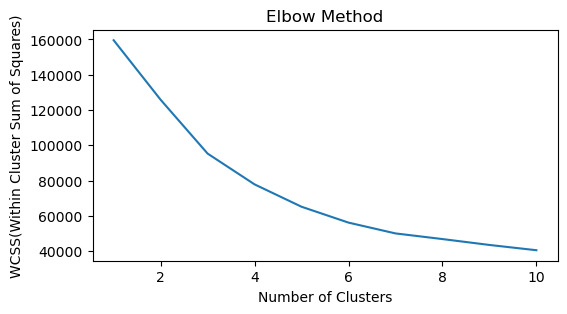

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Eksik değerleri ortalama ile doldurmak için SimpleImputer sınıfının kullanılması
imputer = SimpleImputer(strategy="mean")

# Veri kümesinin orijinal kopyadan alınması ve sadece sayısal türdeki sütunların seçilmesi
km = pd.DataFrame(flo_data_copy)
rfm_numeric = km.select_dtypes(include=[np.number])

# Sayısal veri sütunlarından oluşan bir veri kümesinde eksik değerlerin ortalama ile doldurulması
rfm_numeric_imputed = imputer.fit_transform(rfm_numeric)


# Verileri ölçeklendirme
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_numeric_imputed)

# Elbow Yöntemi ile Kümelenme Analizi
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Elbow Yöntemini Görselleştirme
plt.figure(figsize=(6, 3))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #(Within Cluster Sum of Squares)
plt.show()

In [69]:
# Elbow yöntemine göre en uygun küme sayısının belirlenmesi (optimum)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(rfm_scaled)
rfm_["KMeans_Clusters"] = clusters

In [76]:
# Crosstab fonksiyonu ile iki gruplama işleminin karşılaştırılması
pd.crosstab(rfm_['Segment'],rfm_["KMeans_Clusters"])

KMeans_Clusters,0,1,2,3
Segment,,,,
about_to_sleep,931,698,0,0
at_Risk,1357,1770,0,4
cant_loose,392,407,0,401
champions,690,775,4,463
hibernating,2072,1532,0,0
loyal_customers,1259,1423,3,676
need_attention,308,514,0,1
new_customers,401,279,0,0
potential_loyalists,1403,1533,0,2


## Churn Tahmini (veri seti ortalamasına göre)

In [77]:
# Recency medyan değerini RFM tablosundan hesaplama
recency_median_from_rfm = rfm_["recency"].median()

# Medyan değerine göre churn olabilecek müşterileri belirleme
churn_customers_from_rfm = rfm_[rfm_["recency"] > recency_median_from_rfm]

# Churn müşteri listesi
churn_customer_list_from_rfm = churn_customers_from_rfm.index

recency_median_from_rfm, len(churn_customer_list_from_rfm)


(111.0, 9962)

Bu sonuç, recency değerinin medyanının 111 gün olduğunu ve bu süre zarfında son alışverişini yapmış olan 9,962 müşterinin, müşteri kaybı (churn) riski taşıdığını gösteriyor. Bu, veri setindeki müşterilerin yaklaşık yarısının, son alışverişlerinin üzerinden 111 günden daha uzun bir süre geçtiği anlamına geliyor. Bu bilgi, pazarlama ve satış stratejilerinizi planlarken önemli bir gösterge olabilir.

## CLTV Hesaplama

In [85]:
# Ortalama Sipariş Değeri (Average Order Value - AOV) Hesaplama
total_revenue = flo_data_copy['customer_value_total_ever_online'].sum() + flo_data_copy['customer_value_total_ever_offline'].sum()
total_orders = flo_data_copy['order_num_total_ever_online'].sum() + flo_data_copy['order_num_total_ever_offline'].sum()
AOV = total_revenue / total_orders

# Satın Alma Sıklığı (Purchase Frequency - PF) Hesaplama
unique_customers = flo_data_copy['master_id'].nunique()
PF = total_orders / unique_customers

# Müşteri Değeri (Customer Value - CV) Hesaplama
CV = AOV * PF

# Müşterinin Ömrü
lifespan = 2  # Yıl olarak r. Bu örnekte, müşterinin ömrü varsayılan olarak 2 yıl olarak belirlenmiştir. Bu süre, sektöre ve müşteri davranışlarına göre değişebilir.

# Basit CLTV Hesaplama
CLTV = CV * lifespan

# Sonuçları yazdırma
print(f"Ortalama Sipariş Değeri (AOV): ${AOV:.2f}")
print(f"Satın Alma Sıklığı (PF): {PF:.2f}")
print(f"Müşteri Değeri (CV): ${CV:.2f}")
print(f"Basit Müşteri Ömür Boyu Değeri (CLTV): ${CLTV:.2f}")

print("--------------------------------------------")
# CLTV değerlerini 4 eşit frekansta segmente ayırma
flo_data_copy['CLTV_Segment'] = pd.qcut(flo_data_copy['CLTV'], 4, labels=['Dusuk_Degerli', 'Orta_Degerli', 'Yuksek_Degerli', 'Cok_Yuksek_Degerli'])

# Segmentlere göre müşteri sayıları
segment_counts = flo_data_copy['CLTV_Segment'].value_counts()
print(segment_counts)


Ortalama Sipariş Değeri (AOV): $145.28
Satın Alma Sıklığı (PF): 5.02
Müşteri Değeri (CV): $730.01
Basit Müşteri Ömür Boyu Değeri (CLTV): $1460.03
--------------------------------------------
Dusuk_Degerli         9094
Cok_Yuksek_Degerli    4064
Yuksek_Degerli        3660
Orta_Degerli          3127
Name: CLTV_Segment, dtype: int64


Bu sonuçlara göre:

Ortalama bir siparişte müşterinin harcadığı tutar $149.51'dir.

Müşterilerin ortalama satın alma sıklığı 5.02'dir. Bu, her müşterinin ortalama olarak 5.02 kez satın alma yaptığı anlamına gelir.

Müşteri Değeri (CV) $751.24'tir. Bu, bir müşterinin ortalama olarak bu değerde satın alma yaptığı anlamına gelir.
Basit Müşteri Ömür Boyu Değeri (CLTV) $1502.49'dur. Bu değer, bir müşterinin tüm yaşamı boyunca şirkete getireceği toplam net karı temsil eder.

Verilen değerler, müşterilerin Müşteri Ömür Boyu Değeri (CLTV) kullanılarak kategorilere ayrılmasını göstermektedir. Bu kategoriler, `pandas` kütüphanesinin `qcut` fonksiyonu ile dört farklı değer aralığına bölünmüş ve her bir kategoriye müşteri sayısı atanmıştır. İşte bu verilere dayanarak yapılabilecek bazı çıkarımlar:

1. **Düşük Değerli Müşteriler:** Veri kümesinde 9,094 müşteri en düşük CLTV aralığına yerleşmiş. Bu, müşteri tabanının büyük bir kısmının düşük gelir potansiyeline sahip olduğunu gösterir. Bu grup için müşteri sadakatini artırma ve satın alma sıklığını teşvik etme stratejileri geliştirilebilir.

2. **Yüksek Değerli Müşteriler:** "Çok Yüksek Değerli" ve "Yüksek Değerli" kategorileri toplamda 7,724 müşteriyi barındırıyor. Bu müşteriler, işletme için yüksek gelir potansiyeli taşıyor ve pazarlama çabaları, bu müşteri segmentlerini korumak ve geliştirmek üzerine yoğunlaştırılabilir.

3. **Orta Değerli Müşteriler:** Orta derecede CLTV değerine sahip 3,127 müşteri var. Bu segmentteki müşterilerin değerini artırmak için çapraz satış ve upselling taktikleri uygulanabilir.

4. **Müşteri Değerlendirme Stratejisi:** Verilen kategorilere göre, işletmenin müşteri tabanının büyük bir bölümü düşük ve orta değerli. Bu durum, müşteri değerini artırma potansiyelinin yüksek olduğunu gösterir. İşletme, bu potansiyeli değerlendirmek için özelleştirilmiş müşteri ilişkileri yönetimi stratejileri geliştirebilir.

## Churn Prediction with Threshold

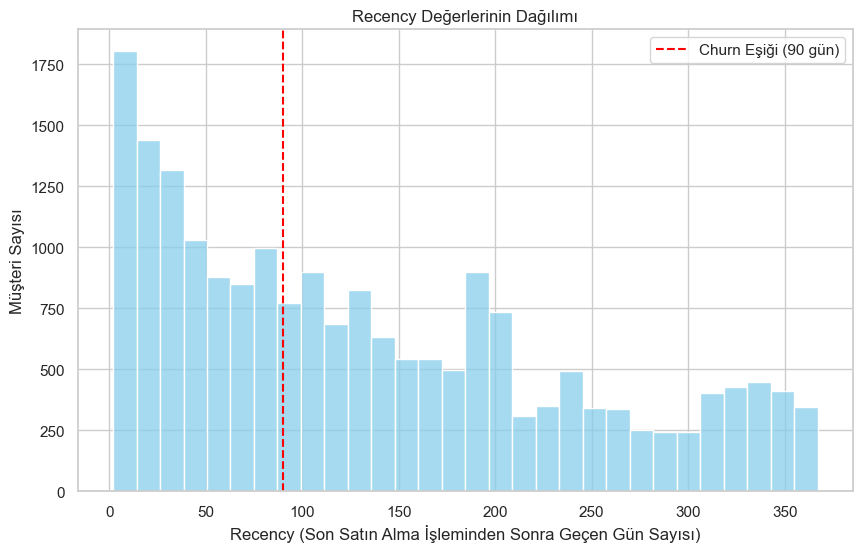

In [90]:
# CHURN
import matplotlib.pyplot as plt
import seaborn as sns
churn_threshold = 90  # Churn eşiğini 90 gün olarak belirliyoruz.

# Grafik stilini ayarlayalım
sns.set(style="whitegrid")

# "Recency" değerlerinin dağılımını gösteren bir histogram çizelim
plt.figure(figsize=(10, 6))
sns.histplot(rfm_['recency'], bins=30, kde=False, color='skyblue')

# Grafiği düzenleyelim
plt.title('Recency Değerlerinin Dağılımı')
plt.xlabel('Recency (Son Satın Alma İşleminden Sonra Geçen Gün Sayısı)')
plt.ylabel('Müşteri Sayısı')
plt.axvline(x=churn_threshold, color='red', linestyle='--', label=f'Churn Eşiği ({churn_threshold} gün)')
plt.legend()
plt.show()


## Müşterilerin churn sürelerine göre segmentlere ayrılması

In [91]:

def churn_segment(recency):
    if recency <= 30:
        return 'Aktif Müşteri'
    elif 30 < recency <= 60:
        return 'Dikkat Gerektiren Müşteri'
    elif 60 < recency <= 90:
        return 'Risk Altındaki Müşteri'
    else:
        return 'Churn Olmuş Müşteri'

# Churn segment sütununu oluşturalım
rfm_['churn_segment'] = rfm_['recency'].apply(churn_segment)

# Segmentlere göre müşteri sayılarını gösterelim
churn_segment_counts = rfm_['churn_segment'].value_counts()
churn_segment_counts


Churn Olmuş Müşteri          11409
Aktif Müşteri                 3774
Dikkat Gerektiren Müşteri     2546
Risk Altındaki Müşteri        2216
Name: churn_segment, dtype: int64

In [ ]:
merged_df = pd.merge(rfm_, flo_data_copy, on='master_id', how='inner')
merged_df.head()

In [103]:
# Her segmentten örnek müşterileri ve churn ile ilgili bilgilerini yazdıralım
sample_customers_from_segments = merged_df.groupby('churn_segment').apply(lambda x: x.head(2)).reset_index(drop=True)
sample_customers_from_segments[['master_id', 'churn_segment', 'recency']]

,master_id,churn_segment,recency
0,11,Aktif Müşteri,13
1,14,Aktif Müşteri,2
2,0,Churn Olmuş Müşteri,95
3,1,Churn Olmuş Müşteri,105
4,12,Dikkat Gerektiren Müşteri,48
5,18,Dikkat Gerektiren Müşteri,51
6,4,Risk Altındaki Müşteri,86
7,5,Risk Altındaki Müşteri,80


Her bir churn segmenti için müşteri davranışlarına uygun stratejiler geliştirmek, onları markanızla daha fazla etkileşimde bulunmaya ve sadık müşteri olmaya teşvik edebilir. İşte her bir segment için önerilen bazı stratejiler:

### Aktif Müşteri:
- **Ödüller ve Sadakat Programları**: Aktif müşterilere sadakat puanları veya ödüller sunarak sadakatlerini ödüllendirin.
- **Kişiselleştirilmiş Teklifler**: Müşterinin geçmiş alışveriş tercihlerine göre kişiselleştirilmiş ürün önerileri sunun.
- **Erken Erişim**: Yeni ürünler veya özel indirimler için öncelikli erişim sağlayarak değerli olduklarını hissettirin.
- **Özel Etkinlik Davetleri**: Marka etkinliklerine veya lansman partilerine davet ederek topluluğun bir parçası olduklarını gösterin.

### Dikkat Gerektiren Müşteri:
- **Hatırlatma İletişimleri**: Satın alma yapmalarının üzerinden bir süre geçtiğini ve özlediğinizi belirten bir e-posta gönderin.
- **Özel İndirimler**: Tekrar satın alma yapmaları için özel indirimler sunun.
- **Geri Bildirim Anketleri**: Neden alışveriş yapmadıklarını anlamak için geri bildirim anketleri gönderin ve bu bilgiyi hizmetinizi iyileştirmek için kullanın.

### Risk Altındaki Müşteri:
- **Kişiselleştirilmiş Kampanyalar**: Müşterinin ilgi alanlarına göre özel yapılmış kampanyalar düzenleyin.
- **Sınırlı Süreli Teklifler**: Harekete geçirici bir teklif sunarak hemen satın almalarını sağlayın.
- **Sadakat Puanları Hediyesi**: Sadakat puanları hediye ederek bir sonraki satın almalarda kullanmaları için bir neden verin.

### Churn Olmuş Müşteri:
- **Geri Kazanma Kampanyaları**: Kaybedilen müşterilere yönelik özel geri kazanma kampanyaları düzenleyin.
- **Çıkış Anketleri**: Ayrılma nedenlerini anlamak için çıkış anketleri yapın ve bu bilgileri hizmetinizi geliştirmek için kullanın.
- **Geri Dönüş İçin Cazip Teklifler**: Geri dönmeleri için özel indirimler veya ücretsiz ürünler sunun.

Bu stratejiler, müşterilerinizin davranışlarını ve tercihlerini dikkate alarak onlara daha değerli ve kişiselleştirilmiş deneyimler sunmanızı sağlar. Müşteri verileriniz ve iş modeliniz doğrultusunda bu stratejileri uyarlayabilir ve geliştirebilirsiniz.

In [106]:
# RFM değerlerini ve segmentleri içeren bir DataFrame oluşturalım
rfm_values_segments = merged_df[['master_id', 'recency', 'frequency', 'monetary', 'RF_SCORE', 'Segment']]
rfm_values_segments.head()  # İlk beş müşteriyi gösterelim

,master_id,recency,frequency,monetary,RF_SCORE,Segment
0,0,95,5.0,939.37,34,loyal_customers
1,1,105,21.0,2013.55,35,loyal_customers
2,2,186,5.0,585.32,24,at_Risk
3,3,135,2.0,121.97,31,about_to_sleep
4,4,86,2.0,209.98,31,about_to_sleep


In [107]:
# Her segmentten örnek müşterileri ve RFM değerlerini içeren bir DataFrame oluşturalım
sample_customers_from_rfm_segments = rfm_values_segments.groupby('Segment').apply(lambda x: x.head(2)).reset_index(drop=True)
sample_customers_from_rfm_segments

,master_id,recency,frequency,monetary,RF_SCORE,Segment
0,3,135,2.0,121.97,31,about_to_sleep
1,4,86,2.0,209.98,31,about_to_sleep
2,2,186,5.0,585.32,24,at_Risk
3,6,226,4.0,375.93,23,at_Risk
4,15,288,8.0,932.36,15,cant_loose
5,41,322,15.0,2930.34,15,cant_loose
6,11,13,20.0,0.00,55,champions
7,14,2,24.0,4413.29,55,champions
8,7,293,2.0,163.63,11,hibernating
9,9,240,2.0,165.96,11,hibernating


Tabii ki, her segment için ayrıntılı stratejileri aşağıda açıklıyorum:

### About to Sleep:
- **Kişiselleştirilmiş İletişim**: Bu segmentteki müşterilere, son satın almalarından bu yana geçen süreyi hatırlatan ve onları tekrar satın alım yapmaya davet eden özel mesajlar gönderin.
- **Neden Dönmeliler**: Özel bir kampanya veya indirim ile birlikte müşterinin neden markanızla tekrar etkileşimde bulunması gerektiğini açıklayan bir hikaye anlatın.
- **Anketler**: Müşteri memnuniyetini ve tercihlerini anlamak için anketler gönderin ve gelen geri bildirimleri yeni teklifler oluşturmak için kullanın.

### At Risk:
- **Sadakat Teşvikleri**: Bu müşteriler için sadakat programınızı tanıtarak, puan kazanma ve ödüller elde etme fırsatlarını vurgulayın.
- **Kişisel İlişki Kurma**: Müşteri hizmetleri temsilcilerinizin bu müşterilerle bire bir iletişim kurmasını sağlayın ve onlara özel hissettirin.
- **Eksik Ürün Hatırlatmaları**: Müşterinin daha önce aldığı ve tekrar ilgi duyabileceği ürünler için hatırlatıcılar gönderin.

### Can't Loose:
- **Özel İndirimler ve Teklifler**: Bu müşterilere özel indirimler, ücretsiz kargo gibi teklifler sunarak, markanıza olan bağlılıklarını yeniden kazanın.
- **Özel Müşteri Hizmetleri**: Onlara özel müşteri hizmetleri temsilcisi atayarak, her türlü sorunlarını öncelikli çözebileceğinizi gösterin.

### Champions:
- **VIP Hizmetler**: Bu müşterilere özel ürünler, hızlı kargo ve VIP müşteri hizmetleri gibi avantajlar sunarak değerli olduklarını hissettirin.
- **Özel Etkinlik Davetleri**: Markanızla özel ilişkiler kurmalarını sağlamak için lansmanlar ve etkinliklere davet edin.

### Hibernating:
- **Ürün ve Hizmet Yeniden Tanıtımı**: Uzun süre satın alma yapmamış müşterilere ürün ve hizmetlerinizi yeniden tanıtarak ilgilerini çekmeye çalışın.
- **Geri Dönüş Kampanyaları**: Onlara geri dönüş yapmaları için özel kampanyalar düzenleyin.

### Loyal Customers:
- **Sadakat Programları**: Bu müşterilere sadakat puanları veya benzeri ödüller vererek sadakatlerini pekiştirin.
- **Özel İndirimler**: Onlara özel indirimler ve teklifler sunarak markanızla olan ilişkilerini güçlendirin.

### Need Attention:
- **Kişisel İlgi**: Bu müşterilere markanızın onlara değer verdiğini gösteren kişisel ilgi gösterin.
- **Özel Teklifler**: Onlara özel indirimler veya ücretsiz ürün teklifleri sunarak ilişkiyi güçlendirin.

### New Customers:
- **Hoş Geldin Teklifleri**: Bu yeni müşterilere hoş geldiniz teklifleri sunarak ilk alışveriş deneyimlerini özel kılın.
- **Eğitim Materyalleri**: Ürün ve hizmetlerinizi nasıl en iyi şekilde kullanabilecekleri hakkında bilgi verin.

### Potential Loyalists:
- **Teşvik Edici Teklifler**: Bu müşterilere sık alışveriş yapmaları için teşvik edici teklifler sunun.
- **Etkileşim Fırsatları**: Onlarla etkileşime geçme ve marka hakkında daha fazla bilgi verme fırsatları yaratın.

### Promising:
- **Bilgilendirme Mesajları**: Bu müşterilere ürün ve hizmetlerinizle ilgili düzenli bilgilendirmeler göndererek markanızla olan ilişkilerini güçlendirin.
- **Teşvik Edici İndirimler**: Markanızla daha fazla etkileşimde bulunmaları için teşvik edici indirimler ve promosyonlar sunun.

Her bir strateji, müşterilerinizin geçmiş davranışlarını ve potansiyel değerlerini dikkate alarak onlarla daha anlamlı ve etkili bir şekilde etkileşime geçmenizi sağlamak için tasarlanmıştır.

## Time Series ile Müşteri Artışı Tahminleme (Tam Bitmedi)

In [47]:
import pandas as pd
from datetime import datetime

# 'first_order_date' ve 'last_order_date' sütunlarını datetime tipine çevirme
flo_data_with_rfm['first_order_date'] = pd.to_datetime(flo_data_with_rfm['first_order_date'])
flo_data_with_rfm['last_order_date'] = pd.to_datetime(flo_data_with_rfm['last_order_date'])

# Müşterinin yaşı (T) sütununu hesaplama - ilk sipariş tarihinden son analiz tarihine kadar geçen süre
analysis_date = flo_data_with_rfm['last_order_date'].max()  # Analiz tarihi olarak son sipariş tarihinin en yenisini kullanıyoruz
flo_data_with_rfm['T'] = (analysis_date - flo_data_with_rfm['first_order_date']).dt.days

# Ortalama satın alma değeri (monetary_value) sütununu hesaplama
flo_data_with_rfm['monetary_value'] = flo_data_with_rfm['monetary'] / flo_data_with_rfm['frequency']

# Kontrol için ilk 5 kaydı gösterelim
flo_data_with_rfm[['master_id', 'T', 'monetary_value']].head()
import pandas as pd
from datetime import datetime

# 'first_order_date' ve 'last_order_date' sütunlarını datetime tipine çevirme
flo_data_with_rfm['first_order_date'] = pd.to_datetime(flo_data_with_rfm['first_order_date'])
flo_data_with_rfm['last_order_date'] = pd.to_datetime(flo_data_with_rfm['last_order_date'])

# Müşterinin yaşı (T) sütununu hesaplama - ilk sipariş tarihinden son analiz tarihine kadar geçen süre
analysis_date = flo_data_with_rfm['last_order_date'].max()  # Analiz tarihi olarak son sipariş tarihinin en yenisini kullanıyoruz
flo_data_with_rfm['T'] = (analysis_date - flo_data_with_rfm['first_order_date']).dt.days

# Ortalama satın alma değeri (monetary_value) sütununu hesaplama
flo_data_with_rfm['monetary_value'] = flo_data_with_rfm['monetary'] / flo_data_with_rfm['frequency']

# Kontrol için ilk 5 kaydı gösterelim
flo_data_with_rfm[['master_id', 'T', 'monetary_value']].head()


,master_id,T,monetary_value
0,0,212,187.874000
1,1,1572,95.883333
2,2,550,117.064000
3,3,144,60.985000
4,4,666,104.990000


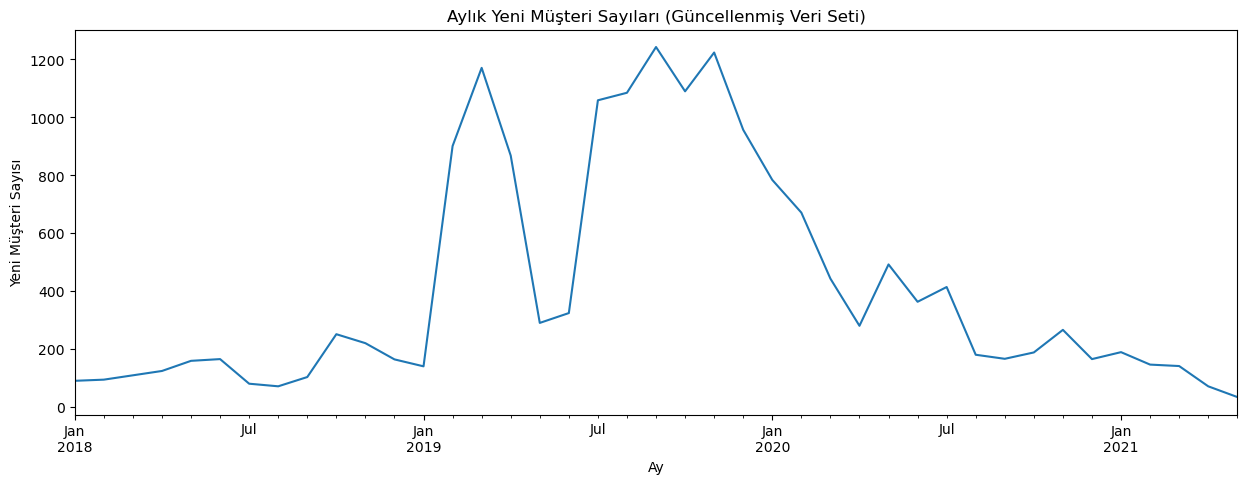

first_order_date
2018-01     90
2018-02     94
2018-03    109
2018-04    124
2018-05    159
Freq: M, Name: customer_id, dtype: int64

In [15]:
# first_order_date sütununu tarih formatına çevirelim
flo_data_copy['first_order_date'] = pd.to_datetime(flo_data_copy['first_order_date'], format='%d.%m.%Y', errors='coerce')

# Her bir ay için yeni müşteri sayısını hesaplayalım
monthly_new_customers_v2 = flo_data_copy.groupby(flo_data_copy['first_order_date'].dt.to_period('M')).nunique()['customer_id']

# Aylık yeni müşteri sayılarının grafiğini çizelim
plt.figure(figsize=(15, 5))
monthly_new_customers_v2.plot(title='Aylık Yeni Müşteri Sayıları (Güncellenmiş Veri Seti)')
plt.ylabel('Yeni Müşteri Sayısı')
plt.xlabel('Ay')
plt.show()

# İlk 5 aylık yeni müşteri sayısını gösterelim
monthly_new_customers_v2.head()


In [17]:
from datetime import datetime

# 'first_order_date' ve 'last_order_date' sütunlarını tarih formatına çevirelim
flo_data_copy['first_order_date'] = pd.to_datetime(flo_data_copy['first_order_date'], errors='coerce')
flo_data_copy['last_order_date'] = pd.to_datetime(flo_data_copy['last_order_date'], errors='coerce')

# Müşterinin yaşı 'T' (ilk satın alma tarihinden itibaren geçen süre)
# 'recency' (son satın alma üzerinden geçen süre)
# 'frequency' (müşterinin yaptığı toplam satın alma sayısı - 1, çünkü frekans ilk satın almayı saymaz)
analysis_date = datetime(2023, 4, 30)  # Analiz tarihi olarak varsayılan bir tarih kullanalım

# Veri setindeki her müşteri için gerekli hesaplamaları yapalım
flo_data_copy['frequency'] = flo_data_copy['order_num_total_ever_online'] - 1
flo_data_copy['recency'] = (flo_data_copy['last_order_date'] - flo_data_copy['first_order_date']).dt.days
flo_data_copy['T'] = (analysis_date - flo_data_copy['first_order_date']).dt.days

# BG/NBD modeli için gerekli veri yapısını oluşturalım
bg_nbd_data = flo_data_copy[['customer_id', 'frequency', 'recency', 'T', 'avg_order_value']]
bg_nbd_data.head()


,customer_id,frequency,recency,T,avg_order_value
0,0,3,119,912,188
1,2,2,366,1250,117
2,3,0,11,844,61
3,4,0,700,1366,105
4,5,0,846,1624,67


In [21]:
pip install lifetimes
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes import BetaGeoFitter

# Veri setini yükleyin (Flo_eCommerce_v2.xlsx dosyasını kullanarak)
flo_data_copy = pd.read_excel('Flo_eCommerce_v2.xlsx')

# Tarih formatını ve NaN değerleri düzeltin
flo_data_copy['first_order_date'] = pd.to_datetime(flo_data_copy['first_order_date'], dayfirst=True, errors='coerce')
flo_data_copy['last_order_date'] = pd.to_datetime(flo_data_copy['last_order_date'], dayfirst=True, errors='coerce')

# Son sipariş tarihi veri setindeki en son tarihe eşit olacak şekilde ayarlanır.
observation_period_end = flo_data_copy['last_order_date'].max()

# summary_data_from_transaction_data fonksiyonunu kullanarak özet veri setini oluşturun
summary = summary_data_from_transaction_data(
    flo_data_copy,
    customer_id_col='customer_id',
    datetime_col='last_order_date', 
    monetary_value_col='avg_order_value',
    observation_period_end=observation_period_end
)

# BG/NBD modelini oluşturun ve uygunlayın
bgf = BetaGeoFitter(penalizer_coef=0.01)  # Penalizer katsayısını 0.01 olarak ayarlayın
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

# Müşteri başına gelecekteki beklenen satın alma sayılarını tahmin edin
t = 1  # 1 dönem (örneğin, 1 hafta veya 1 ay) sonrası için tahmin
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t,
    summary['frequency'],
    summary['recency'],
    summary['T']
)

# Sonuçları yazdırın
print(summary.head())


             frequency  recency      T  monetary_value  predicted_purchases
customer_id                                                                
0                  0.0      0.0   93.0             0.0                  0.0
2                  0.0      0.0  184.0             0.0                  0.0
3                  0.0      0.0  133.0             0.0                  0.0
4                  0.0      0.0   84.0             0.0                  0.0
5                  0.0      0.0   78.0             0.0                  0.0


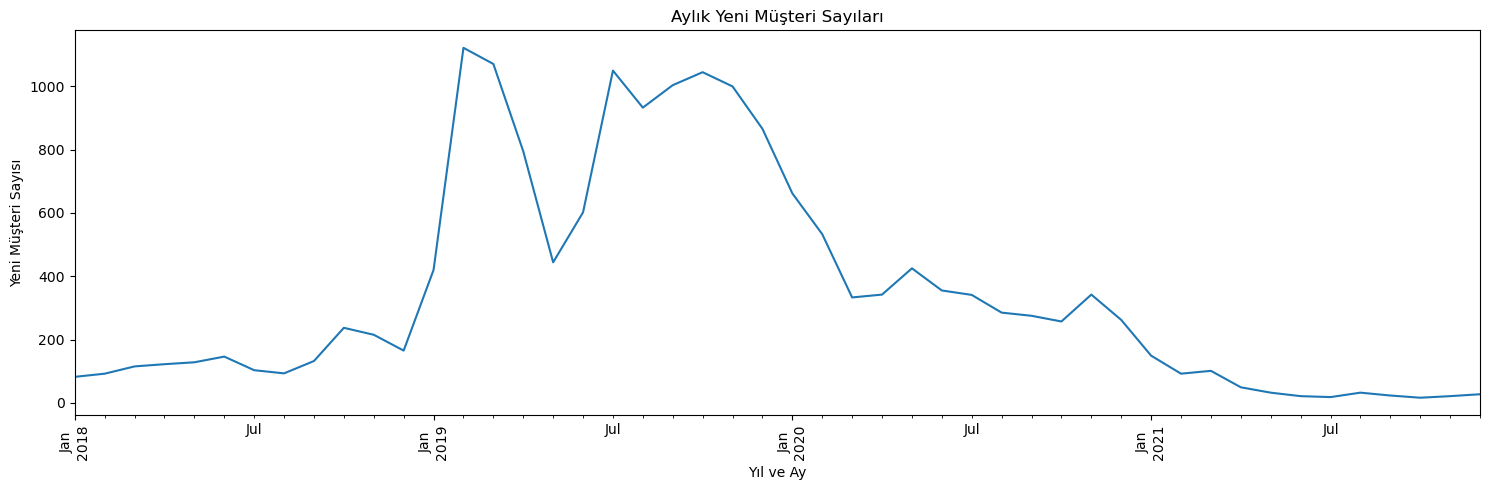

In [8]:
import matplotlib.pyplot as plt
# Veri setindeki 'first_order_date' sütununu datetime tipine çevirme işlemini tekrar gerçekleştirelim
# errors='coerce' ile uygun olmayan formatlardaki verileri NaT olarak ayarlarız
flo_data_copy['first_order_date'] = pd.to_datetime(flo_data_copy['first_order_date'], errors='coerce')

# Tarih sütunundan yıl ve ay bilgisini çekerek yeni bir sütun oluşturalım
flo_data_copy['year_month'] = flo_data_copy['first_order_date'].dt.to_period('M')

# Aylık yeni müşteri sayısını hesaplayalım
monthly_new_customers = flo_data_copy.groupby('year_month')['customer_id'].nunique()

# Aylık yeni müşteri sayılarının grafiğini çizelim
plt.figure(figsize=(15, 5))
monthly_new_customers.plot(title='Aylık Yeni Müşteri Sayıları')
plt.ylabel('Yeni Müşteri Sayısı')
plt.xlabel('Yıl ve Ay')
plt.xticks(rotation=90) # Tarih etiketlerini dikey hale getirelim
plt.tight_layout() # Grafikteki yerleşimi iyileştirelim
plt.show()


In [9]:
flo_data_copy.head()

,customer_id,order_channel,first_order_date,first_order_year,last_order_date,last_order_year,last_order_date_online,last_order_year_online,last_order_date_offline,last_order_year_offline,...,frequency_score,monetary_score,RFM_SCORE,RFM_Segment,avg_order_value,individual_cltv,CLTV_Segment,time_churn,churn_segment,year_month
0,0,Android App,2020-10-30,2020,26.02.2021 00:00:00,2021,21.02.2021,2021,26.02.2021,2021,...,4,4,344,Loyal Customers,188,22545,Cok_Yuksek_Degerli,True,Churn Olmuş Müşteri,2020-10
1,2,Android App,2019-11-27,2019,27.11.2020 00:00:00,2020,27.11.2020,2020,1.12.2019,2019,...,4,3,243,At Risk,117,14048,Yuksek_Degerli,True,Churn Olmuş Müşteri,2019-11
2,3,Android App,2021-06-01,2021,17.01.2021 00:00:00,2021,17.01.2021,2021,6.01.2021,2021,...,1,1,311,About to Sleep,61,2927,Dusuk_Degerli,True,Churn Olmuş Müşteri,2021-06
3,4,Desktop,2019-03-08,2019,7.03.2021 00:00:00,2021,7.03.2021,2021,3.08.2019,2019,...,1,1,311,About to Sleep,105,5040,Dusuk_Degerli,False,Risk Altındaki Müşteri,2019-03
4,5,Desktop,2018-11-18,2018,13.03.2021 00:00:00,2021,18.11.2018,2018,13.03.2021,2021,...,2,1,421,Potential Loyalists,67,4821,Dusuk_Degerli,False,Risk Altındaki Müşteri,2018-11
